In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
#Cantidad de columnas
print(f'Cantidad de columnas del dataframe: {len(df.columns)}')

Cantidad de columnas del dataframe: 19


In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [8]:
#Columna tiempo de manejo en minutos
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta('1m')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [9]:
#Desviacion Standar
print(f'Desviacion Standar de tiempo de conduccion: {df.duration.std()}')

Desviacion Standar de tiempo de conduccion: 42.59435124195458


count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64


<Axes: >

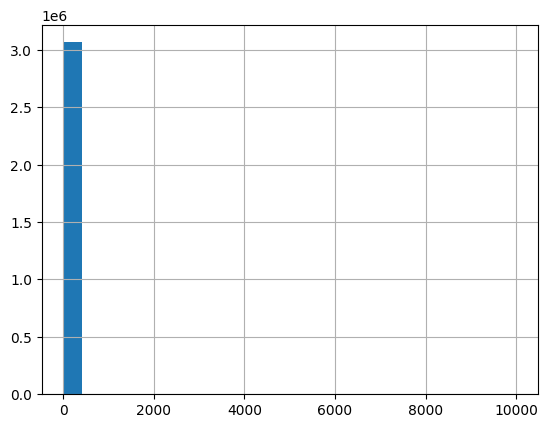

In [10]:
#outliers
print(df['duration'].describe())
df['duration'].hist(bins=20, rwidth=0.8)

In [11]:
#Quitando Outliers
after_dropping_outlier = ((df.duration >= 1) & (df.duration <= 60)).mean()
df = df[(df.duration >= 1) & (df.duration <= 60)]
print(f'Fraccion de registros luego de quitar outliers: {after_dropping_outlier}')


Fraccion de registros luego de quitar outliers: 0.9812202822125979


<Axes: >

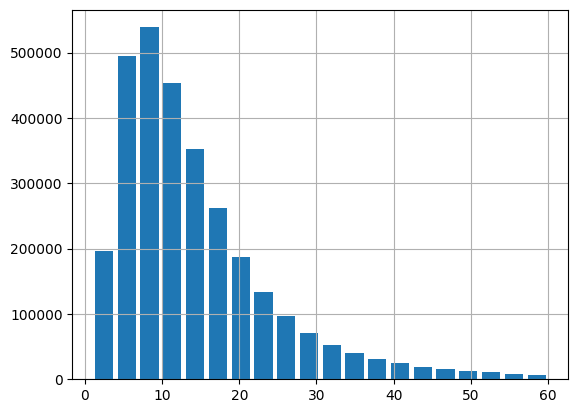

In [12]:
#historgrama
df['duration'].hist(bins=20, rwidth=0.8)

In [13]:
#one Hot encoding
categorical = ['PULocationID','DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f"Columnas luego de ejecutar Vectorizer: {X_train.shape[1]}")

Columnas luego de ejecutar Vectorizer: 515


In [14]:
target = 'duration'
y_train = df[target].values

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE Train: 7.649261822035489


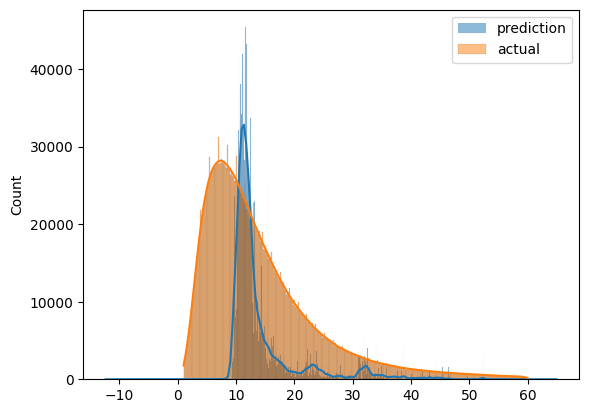

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#MSE
y_pred = lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
print(f'RMSE Train: {rmse_train}')
#RESULTADOS
sns.histplot(y_pred, label='prediction', kde=True)
sns.histplot(y_train, label='actual', kde=True)
plt.legend(); plt.show()

In [3]:
# Funcion para transformar la data
def transform(filename):
    # Carga
    df = pd.read_parquet(filename)
    
    # Limpieza - trasnformacion
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta('1m')
    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

In [4]:
df_train = transform('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = transform('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [7]:
# Tamaño
len(df_train), len(df_val)

(3009173, 2855951)

In [8]:
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical].to_dict(orient='records')
X_valid = dv.transform(val_dicts)

In [9]:
target = 'duration'
y_train = df_train[target].values
y_valid = df_val[target].values

In [21]:
# Modelo de regresion
lr = LinearRegression()
lr.fit(X_train, y_train)

# Resumen
y_pred_train = lr.predict(X_train)
y_pred_valid = lr.predict(X_valid)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)
print(f'MSE Train: {rmse_train}')
print(f'MSE Valid: {rmse_valid}')

MSE Train: 7.649261822035489
MSE Valid: 7.811821332387183


/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
with open('model.bin','wb') as f_out:
    pickle.dump((dv,lr), f_out)

## Mlflow

In [21]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

<Experiment: artifact_location='/home/leo-unix/leo_workspace/mlops_data_talks_club/01. Introduction/mlruns/1', creation_time=1716861673754, experiment_id='1', last_update_time=1716861673754, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [11]:
with mlflow.start_run():

    mlflow.set_tag('developer','leo')

    mlflow.log_param('train-data-path' , 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
    mlflow.log_param('valid-data-path' , 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')    
    
    alpha = 0.01
    mlflow.log_param('alpha', alpha)

    lr = Lasso(alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    mlflow.log_metric('rmse',rmse)

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# XGBOOST MODEL

In [12]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [13]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_valid, label=y_valid)

In [14]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_valid, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [15]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=3,
    trials=Trials()
)

  0%|          | 0/3 [00:00<?, ?trial/s, best loss=?]

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:43:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.71543                          
[1]	validation-rmse:9.41986                          
[2]	validation-rmse:9.17119                          
[3]	validation-rmse:8.95984                          
[4]	validation-rmse:8.78434                          
[5]	validation-rmse:8.63856                          
[6]	validation-rmse:8.51501                          
[7]	validation-rmse:8.40728                          
[8]	validation-rmse:8.31895                          
[9]	validation-rmse:8.23235                          
[10]	validation-rmse:8.16786                         
[11]	validation-rmse:8.11286                         
[12]	validation-rmse:8.06507                         
[13]	validation-rmse:8.01927                         
[14]	validation-rmse:7.96294                         
[15]	validation-rmse:7.93050                         
[16]	validation-rmse:7.90013                         
[17]	validation-rmse:7.87386                         
[18]	validation-rmse:7.84720

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:46:42] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.50497                                                   
[1]	validation-rmse:9.04894                                                   
[2]	validation-rmse:8.67340                                                   
[3]	validation-rmse:8.24620                                                   
[4]	validation-rmse:7.99545                                                   
[5]	validation-rmse:7.77973                                                   
[6]	validation-rmse:7.62912                                                   
[7]	validation-rmse:7.36465                                                   
[8]	validation-rmse:7.26543                                                   
[9]	validation-rmse:7.17787                                                   
[10]	validation-rmse:7.00241                                                  
[11]	validation-rmse:6.94529                                                  
[12]	validation-rmse:6.89590                        

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:51:27] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



[0]	validation-rmse:9.12486                                                    
[1]	validation-rmse:8.40550                                                    
[2]	validation-rmse:7.93143                                                    
[3]	validation-rmse:7.26510                                                    
[4]	validation-rmse:6.89115                                                    
[5]	validation-rmse:6.71920                                                    
[6]	validation-rmse:6.59610                                                    
[7]	validation-rmse:6.50290                                                    
[8]	validation-rmse:6.39895                                                    
[9]	validation-rmse:6.34650                                                    
[10]	validation-rmse:6.06988                                                   
[11]	validation-rmse:6.03950                                                   
[12]	validation-rmse:5.85225            

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



In [23]:
with mlflow.start_run():

    best_params = {
        'max_depth': 30,
        'learning_rate': 0.09585355369315604,
        'reg_alpha': 0.018060244040060163,
        'reg_lambda': 0.011658731377413597,
        'min_child_weight': 1.060597050922164,
        'objective': 'reg:linear',
        'seed': 42
    }

    mlflow.log_params(best_params)

    booster = xgb.train(
        params = best_params,
        dtrain = train,
        num_boost_round = 1000,
        evals = [(valid,'validation')],
        early_stopping_rounds = 50,
    )

    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    mlflow.log_metric('rmse',rmse)

    with open('models/preprocessor.b', 'wb') as f_out:
            pickle.dump(dv, f_out)


    mlflow.log_artifact('models/preprocessor.b', artifact_path='preprocessor')

    mlflow.xgboost.log_model(booster, artifact_path = 'models_nflow')

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:41:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:9.66700
[1]	validation-rmse:9.32544
[2]	validation-rmse:9.02772
[3]	validation-rmse:8.77833
[4]	validation-rmse:8.52259
[5]	validation-rmse:8.33312
[6]	validation-rmse:8.17951
[7]	validation-rmse:8.00152
[8]	validation-rmse:7.89076
[9]	validation-rmse:7.79476
[10]	validation-rmse:7.71204
[11]	validation-rmse:7.64024
[12]	validation-rmse:7.57481
[13]	validation-rmse:7.52044
[14]	validation-rmse:7.46677
[15]	validation-rmse:7.35188
[16]	validation-rmse:7.31632
[17]	validation-rmse:7.28409
[18]	validation-rmse:7.25377
[19]	validation-rmse:7.15253
[20]	validation-rmse:7.12958
[21]	validation-rmse:7.10918
[22]	validation-rmse:7.02467
[23]	validation-rmse:7.00793
[24]	validation-rmse:6.98921
[25]	validation-rmse:6.97384
[26]	validation-rmse:6.95163
[27]	validation-rmse:6.93886
[28]	validation-rmse:6.84799
[29]	validation-rmse:6.83748
[30]	validation-rmse:6.76422
[31]	validation-rmse:6.75510
[32]	validation-rmse:6.74551
[33]	validation-rmse:6.73503
[34]	validation-rmse:6.6

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:47:42] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [24]:
logged_model = 'runs:/f124fdae13084fab8471006d74400aa1/models_nflow'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:49:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [25]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_nflow
  flavor: mlflow.xgboost
  run_id: f124fdae13084fab8471006d74400aa1

In [26]:
xgboost_model = mlflow.xgboost.load_model(logged_model)
xgboost_model

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:51:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [27]:
xgboost_model.best_iteration

999

In [28]:
y_pred_xg = xgboost_model.predict(valid)

In [29]:
y_pred_xg[:10]

array([ 6.416345 , 44.16527  , 15.994769 , 21.00645  , 24.340927 ,
        5.4898696, 20.326824 ,  6.2756224,  6.9346776, 12.071709 ],
      dtype=float32)